In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#%matplotlib inline
%matplotlib nbagg
#%matplotlib notebook
#from sample.data import gen_kura_data
N = 100
D = 3
L = 2
resolution = 15
K = resolution**L
T = 100
tau = 80
sigma_min = 0.1
sigma_max = 1.0

seed = 0
np.random.seed(seed)

In [22]:
def gen_kura_data(num):
#    num = params.num_samples
    np.random.seed(seed)
    z1 = np.random.uniform(low=-1, high=+1, size=(num))
    z2 = np.random.uniform(low=-1, high=+1, size=(num))

    X = np.empty(shape=(num, D))
    X[:, 0] = z1
    X[:, 1] = z2
    X[:, 2] = 0.5 * (z1**2 - z2**2)
    return X

In [23]:
X = gen_kura_data(N)
print(X.shape)

(100, 3)


<IPython.core.display.Javascript object>


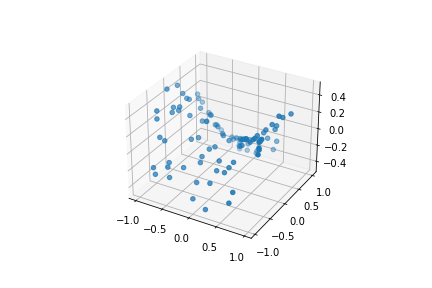

In [24]:
plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

(225, 2)


<IPython.core.display.Javascript object>


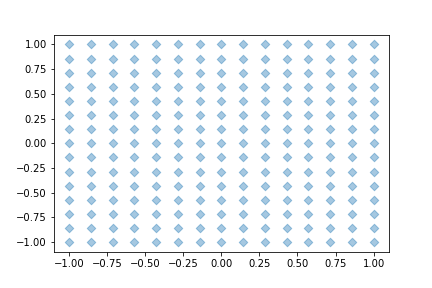

In [25]:
A = np.linspace(-1,1,resolution)
B = np.linspace(-1,1,resolution)
XX, YY = np.meshgrid(A,B)
M = np.concatenate([XX.reshape(-1)[:,None], YY.reshape(-1)[:,None]], axis=1)
print(M.shape)
plt.close()
plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')

In [26]:
np.random.seed(seed)
Z = 2*np.random.rand(N, L)-1
print(Z.shape)
#print(Z)

(100, 2)


<IPython.core.display.Javascript object>


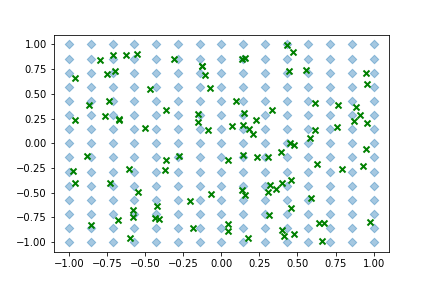

In [27]:
plt.close()
plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')
plt.scatter(Z[:, 0], Z[:, 1], color='g', marker='x', linewidth=2)

In [28]:
#データの距離
def distance(A, B):
    #Aはデータ(こっちで用意するやつ),Bは構造(ノード)
    D = np.sum((A[:, None, :]-B[None, :, :])**2, axis=2)
    return D

In [29]:
#参照ベクトルの推定
def estimate_y(Z, M, tau, t):
    sigma = max((sigma_min-sigma_max)*(t/tau)+sigma_max, sigma_min)
    #sigma = max(sigma_max*np.exp(-t/tau), sigma_min)
    #print(sigma)
    #R_knの集合R
    R = np.exp((-1/(2*(sigma**2)))*distance(Z, M))
    #g_kの集合G
    G = np.sum(R, axis=1)
    #Y = np.sum([(R[n]*X[n])/G[n] for n in range(N)]) 
    #h_nk:k番目の参照ベクトルにおけるx_nの比率
    #h_nkの集合
    H = R/G[:, None]
    Y = H.T @ X
    return Y

In [30]:
#estimate_y(Z, M, 10)

In [31]:
#潜在変数の推定
def estimate_z(X, Y):
    K_star = np.argmin(distance(X, Y), axis=1)
#    print(K_star,K_star.shape)
    Z = M[K_star]
#    print(Z, Z.shape)
    
    return Z

In [32]:
#aaa=estimate_z(X, estimate_y(Z, M, 10))
#plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')
#plt.scatter(aaa[:, 0], aaa[:, 1], color='g', marker='x', linewidth=2)
#print(aaa)

In [33]:
y_hist=[]
z_hist=[]
for t in range(T):
    Y = estimate_y(Z, M, tau, t)
    y_hist.append(Y)
    Z = estimate_z(X, Y)
    z_hist.append(Z)

In [34]:
print(np.shape(z_hist))

(100, 100, 2)


<IPython.core.display.Javascript object>


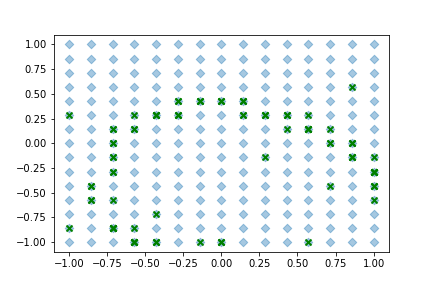

In [66]:
plt.close()
Z = z_hist[50]
#i = 50
#z_hist = np.array(z_hist)
plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')
plt.scatter(Z[:, 0], Z[:, 1], color='g', marker='x', linewidth=2)
#plt.scatter(z_hist[i, :, 0], z_hist[i, :, 1], color='g', marker='x', linewidth=2)
plt.show()

In [76]:
#潜在変数描画奴
def update(i):
    print(i)
    plt.cla()
    Z = z_hist[i]
    plt.title(f"学習回数{i+1}回目", fontname="MS Gothic")
    plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')
    plt.scatter(Z[:, 0], Z[:, 1], color='g', marker='x', linewidth=2)

In [77]:
#テスト用
def plot(data):
    plt.cla()                      # 現在描写されているグラフを消去
    rand = np.random.randn(100)    # 100個の乱数を生成
    im = plt.plot(rand)            # グラフを生成

<IPython.core.display.Javascript object>


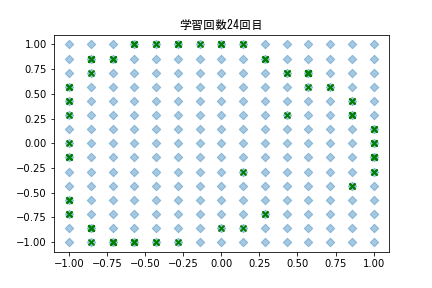

In [88]:
#潜在変数アニメーション
plt.close()
fig = plt.figure()
viewer = animation.FuncAnimation(fig, update)
plt.show()

In [84]:
ani = animation.FuncAnimation(fig, update)
ani.save("z_history.gif", writer="pillow")

1364
1365
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


<IPython.core.display.Javascript object>


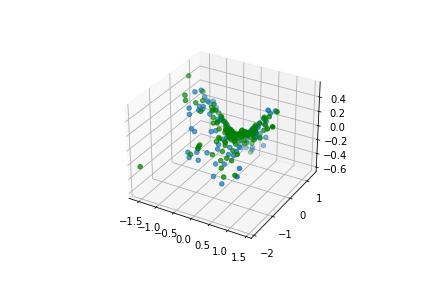

In [51]:
plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c='g')
plt.show()